# Pre-Processing and Training Data

# Contents<a id='Contents'></a>
* [1 Pre-Processing and Training Data](#1_Pre-Processing_and_Training_Data)
  * [1.1 Problem Statement](#1.1_Problem_Statement)
  * [1.2 Imports](#1.2_Imports)
  * [1.3 Sourcing and Loading](#1.3_Sourcing_and_Loading)
      * [1.3.1 Load the Data](#1.3.2_Load_the_Data)
      * [1.3.2 Explore the Data](#1.3.2_Explore_the_Data)
      * [1.3.3 Filtering Down to One Location](#1.3.3_Filtering_Down_to_One_Location)
  * [2.1 Transforming and Visualizing](#2.1_Transforming_and_Visualizing)
      * [2.1.1 Setting Date as Index](#2.1.1_Setting_Date_as_Index)
      * [2.1.2 Making a Predictor Value y](#2.1.2_Making_a_Predictor_Value_y)
  * [3.1 Modeling](#3.1_Modeling)
      * [3.1.1 ARIMA Model](#3.1.1_ARIMA_Model)
          * [3.1.1.1 Decomposition](#3.1.1.1_Decomposition)
          * [3.1.1.2 Testing for Stationarity with KPSS](#3.1.1.2_Testing_for_Stationarity_with_KPSS)
          * [3.1.1.3 Making the Data Stationary](#3.1.1.3_Making_the_Data_Stationary)
          * [3.1.1.4 ARIMA Model](#3.1.1.4_ARIMA_Model)  
      * [3.2.1 Prophet Model](#3.2.1_Prophet_Model)
          * [3.2.1.1 Current Forecast](#3.2.1.1_Current_Forecast)
          * [3.2.1.2 Future Forecast](#3.2.1.2_Future_Forecast)
      * [3.3.1 Pyramid Model](#3.3.1_Pyramid_Model)

## 1.1 Problem Statement

Now that we know there is no missing data and we have all the data we need, we will start making models with one store location. I am interested in 3365 - Gardens on Havana - Aurora, CO (XF) because it is one of the busiest stores in the nation. Once we have built a model that fits our requirements, we will move to modeling.

## 1.2 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

## 1.3 Sourcing and Loading

### 1.3.1 Load the Data

In [2]:
df = pd.read_excel(r'/Users/Alan/Library/CloudStorage/OneDrive-Comcast/Python/Springboard/Data Wrangling.xlsx')
df.head().T

0                         1  \
Traffic_Date              2014-12-22 00:00:00       2014-12-22 00:00:00   
STORE_NAME        3351 - Albuquerque, NM (XF)  3352 - Lakewood, CO (XF)   
STORE_CITY_NAME                   Albuquerque                  Lakewood   
STORE_STATE_CODE                           NM                        CO   
Door_Swings                               656                       452   

                                                 2                         3  \
Traffic_Date                   2014-12-22 00:00:00       2014-12-22 00:00:00   
STORE_NAME        3353 - Colorado Springs, CO (XF)  3354 - Thornton, CO (XF)   
STORE_CITY_NAME                   Colorado Springs                  Thornton   
STORE_STATE_CODE                                CO                        CO   
Door_Swings                                    562                       594   

                                        4  
Traffic_Date          2014-12-22 00:00:00  
STORE_NAME        3356 - Boulder, CO (XF)  
STORE_CITY_NAME                   Boulder  
STORE_STATE_CODE                       CO  
Door_Swings                           369

In [3]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

### 1.3.2 Explore the Data

In [4]:
df.head()

date                        store_name              city state  \
0 2014-12-22       3351 - Albuquerque, NM (XF)       Albuquerque    NM   
1 2014-12-22          3352 - Lakewood, CO (XF)          Lakewood    CO   
2 2014-12-22  3353 - Colorado Springs, CO (XF)  Colorado Springs    CO   
3 2014-12-22          3354 - Thornton, CO (XF)          Thornton    CO   
4 2014-12-22           3356 - Boulder, CO (XF)           Boulder    CO   

   door_swings  
0          656  
1          452  
2          562  
3          594  
4          369

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74789 entries, 0 to 74788
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         74789 non-null  datetime64[ns]
 1   store_name   74789 non-null  object        
 2   city         74789 non-null  object        
 3   state        74789 non-null  object        
 4   door_swings  74789 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [6]:
df.dtypes

date           datetime64[ns]
store_name             object
city                   object
state                  object
door_swings             int64
dtype: object

In [7]:
df.isnull().values.any()

False

### 1.3.3 Filtering Down to One Location

In [8]:
a3365 = df[df.store_name == '3365 - Gardens on Havana - Aurora, CO (XF)']

In [9]:
a3365.head()

date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings  
16438         1017  
16458          433  
16478          881  
16498          683  
16518          734

In [10]:
a3365.tail()

date                                  store_name    city state  \
74554 2022-11-16  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74604 2022-11-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74654 2022-11-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74704 2022-11-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74754 2022-11-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings  
74554          465  
74604          379  
74654          436  
74704          519  
74754            1

## 2.1 Transforming and Visualizing

### 2.1.1 Transforming the Data

In [11]:
a3365['fiscal_month'] = np.where(a3365.date.dt.day < 22, a3365.date, a3365.date + pd.DateOffset(months=1))
a3365.fiscal_month = a3365.fiscal_month.dt.strftime('%Y-%m')

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3009544006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365['fiscal_month'] = np.where(a3365.date.dt.day < 22, a3365.date, a3365.date + pd.DateOffset(months=1))
/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3009544006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365.fiscal_month = a3365.fiscal_month.dt.strftime('%Y-%m')


Our fiscal months start on the 22nd and go to the 21st of every month. I have to write a code to add fiscal month to the dataset.

In [12]:
print(a3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
74554 2022-11-16  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74604 2022-11-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74654 2022-11-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74704 2022-11-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74754 2022-11-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017      2018-

In [13]:
a3365['fiscal_month'] = pd.to_datetime(a3365['fiscal_month'])

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/2455018305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a3365['fiscal_month'] = pd.to_datetime(a3365['fiscal_month'])


Converted the `fiscal_month` column to a datetime.

In [14]:
print(a3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
74554 2022-11-16  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74604 2022-11-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74654 2022-11-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74704 2022-11-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74754 2022-11-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017   2018-10-

In [15]:
a3365.dtypes

date            datetime64[ns]
store_name              object
city                    object
state                   object
door_swings              int64
fiscal_month    datetime64[ns]
dtype: object

I want to remove all data besides `fiscal_month` and I want to add a column with the monthly total door swings.

In [16]:
a3365 = a3365.groupby(a3365.fiscal_month)

In [17]:
a3365 = a3365['door_swings'].sum().reset_index()

In [18]:
a3365 = a3365.set_index('fiscal_month')

In [19]:
a3365.rename(columns={'door_swings' : 'monthly_door_swings'}, inplace=True)

In [20]:
print(a3365)

              monthly_door_swings
fiscal_month                     
2018-10-01                  12647
2018-11-01                  26827
2018-12-01                  23800
2019-01-01                  25154
2019-02-01                  23713
2019-03-01                  22679
2019-04-01                  24328
2019-05-01                  22982
2019-06-01                  24835
2019-07-01                  23335
2019-08-01                  26572
2019-09-01                  25533
2019-10-01                  23168
2019-11-01                  20639
2019-12-01                  19031
2020-01-01                  19077
2020-02-01                  18824
2020-03-01                  19365
2020-04-01                  14772
2020-05-01                  15855
2020-06-01                  19299
2020-07-01                  22360
2020-08-01                  26327
2020-09-01                  24834
2020-10-01                  22829
2020-11-01                  23648
2020-12-01                  20887
2021-01-01    

### 2.1.2 Making a Predictor Value `y`

In [21]:
y = a3365['monthly_door_swings']

In [22]:
print(y)

fiscal_month
2018-10-01    12647
2018-11-01    26827
2018-12-01    23800
2019-01-01    25154
2019-02-01    23713
2019-03-01    22679
2019-04-01    24328
2019-05-01    22982
2019-06-01    24835
2019-07-01    23335
2019-08-01    26572
2019-09-01    25533
2019-10-01    23168
2019-11-01    20639
2019-12-01    19031
2020-01-01    19077
2020-02-01    18824
2020-03-01    19365
2020-04-01    14772
2020-05-01    15855
2020-06-01    19299
2020-07-01    22360
2020-08-01    26327
2020-09-01    24834
2020-10-01    22829
2020-11-01    23648
2020-12-01    20887
2021-01-01    21842
2021-02-01    22975
2021-03-01    23080
2021-04-01    25475
2021-05-01    24777
2021-06-01    25046
2021-07-01    23238
2021-08-01    19674
2021-09-01    16812
2021-10-01    17623
2021-11-01    16824
2021-12-01    14577
2022-01-01    14238
2022-02-01    14969
2022-03-01    14484
2022-04-01    16305
2022-05-01    14590
2022-06-01    14851
2022-07-01    15951
2022-08-01    16959
2022-09-01    17413
2022-10-01    16415
2022-11

### 2.1.3 Getting Summary Statistics for `y`

In [23]:
a3365.describe()

monthly_door_swings
count            50.000000
mean          20310.320000
std            4160.953871
min           12647.000000
25%           16514.250000
50%           20763.000000
75%           23696.750000
max           26827.000000

In [24]:
a3365.dtypes

monthly_door_swings    int64
dtype: object

In [25]:
y.plot()

<AxesSubplot:xlabel='fiscal_month'>

## 3.1 Modeling

### 3.1.1 ARIMA Model

#### 3.1.1.1 Decomposition

In [26]:
import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomp.plot()
fig.set_size_inches((16, 10))
fig.tight_layout()
plt.show()

#### 3.1.1.2 Testing for Stationarity with KPSS

In [27]:
from statsmodels.tsa.stattools import kpss

kpss(y)

(0.5312785385580363,
 0.03462195077521705,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### 3.1.1.3 Making the Data Stationary

In [28]:
y.plot()

<AxesSubplot:xlabel='fiscal_month'>

In [29]:
y_log = np.log(y)

In [30]:
y_log.plot()

<AxesSubplot:xlabel='fiscal_month'>

In [31]:
kpss(y_log.diff().dropna())

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.21360411504164775,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### 3.1.1.4 ARIMA Model

In [32]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [33]:
def evaluate_arima_model(data, arima_order):
    split = int(len(data) * 0.8)

    # Tran and test variables
    train, test = data[0:split], data[split:len(data)]
    past = [x for x in train]
    # print(past)

    # Make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])

    # Calculate out od sample error
    error = mean_squared_error(test, predictions)

    # Return error
    return error 

In [34]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None

    # Iterate through p_values
    for p in p_values:

        # Iterate through d_values
        for d in d_values:

            # Iterate through q_values
            for q in q_values:

                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.12f' % (order,mse))
                except:
                    continue
    print("\nBest ARIMA%s MSE=%.3f" % (best_cfg, best_score))
    return (best_cfg, best_score)

In [35]:
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [36]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
best_cfg, best_score = evaluate_models(y_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.081360109679


/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 1) MSE=0.035941214751
ARIMA(0, 0, 2) MSE=0.029083008331
ARIMA(0, 1, 0) MSE=0.006691159490
ARIMA(0, 1, 1) MSE=0.006633288217
ARIMA(0, 1, 2) MSE=0.007447506177
ARIMA(0, 2, 0) MSE=0.012496944189
ARIMA(0, 2, 1) MSE=0.007633961261
ARIMA(0, 2, 2) MSE=0.007777258688
ARIMA(1, 0, 0) MSE=0.008554707460
ARIMA(1, 0, 1) MSE=0.008802726059
ARIMA(1, 0, 2) MSE=0.015424443834
ARIMA(1, 1, 0) MSE=0.006654941211
ARIMA(1, 1, 1) MSE=0.006746149808
ARIMA(1, 1, 2) MSE=0.013151953003
ARIMA(1, 2, 0) MSE=0.010674824588
ARIMA(1, 2, 1) MSE=0.007838366537
ARIMA(1, 2, 2) MSE=0.007978157159
ARIMA(2, 0, 0) MSE=0.009043207693


/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) MSE=0.008500746564
ARIMA(2, 0, 2) MSE=0.020599479237
ARIMA(2, 1, 0) MSE=0.007057570880


/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 1) MSE=0.007067779612
ARIMA(2, 1, 2) MSE=0.011068660709
ARIMA(2, 2, 0) MSE=0.010556838057
ARIMA(2, 2, 1) MSE=0.008094291171
ARIMA(2, 2, 2) MSE=0.008120336733

Best ARIMA(0, 1, 1) MSE=0.007


In [37]:
p= 0
d= 1
q= 1
model = ARIMA(y_log, order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     monthly_door_swings   No. Observations:                   50
Model:                  ARIMA(0, 1, 1)   Log Likelihood                  25.608
Date:                 Mon, 23 Jan 2023   AIC                            -47.216
Time:                         14:28:08   BIC                            -43.433
Sample:                     10-01-2018   HQIC                           -45.781
                          - 11-01-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0936      0.259     -0.361      0.718      -0.602       0.415
sigma2         0.0206      0.002     11.703      0.000       0.017       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               382.37
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             2.70
Prob(H) (two-sided):                  0.01   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = plt.plot(y_log.diff(), label="data")
ax = plt.plot(model_fit.predict()[1:].diff(), label="prediction")
plt.legend()
plt.show()

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/4272257573.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.plot(y_log['Nov 2022'].append(future_months['Prediction']))


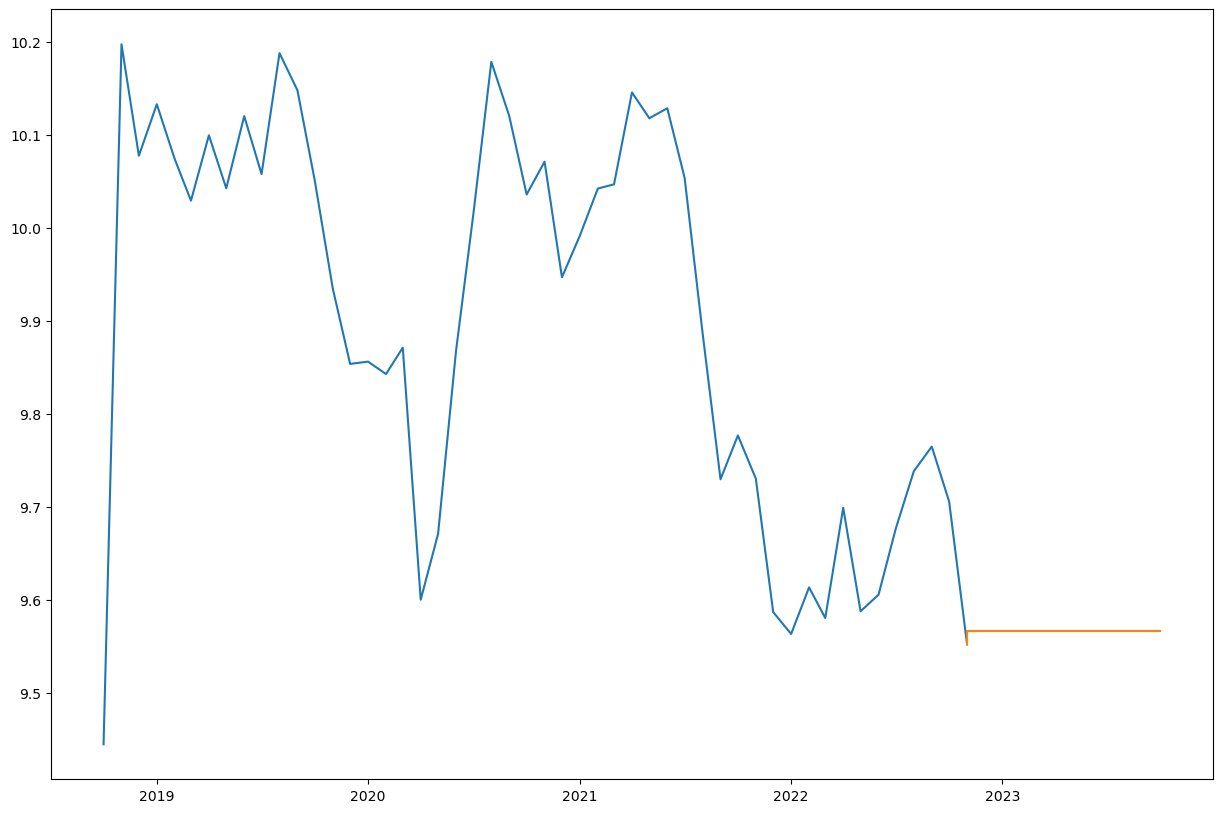

In [40]:
forecast_period = 12
date_range = pd.date_range(y_log.index[-1], periods = forecast_period, 
              freq='MS').strftime("%Y-%m-%d").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Month'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Month'] = pd.to_datetime(future_months['Month'])
future_months.set_index('Month', inplace = True)
future_months['Prediction'] = forecast[0]

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(y_log)
plt.plot(y_log['Nov 2022'].append(future_months['Prediction']))
plt.show()

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3012158202.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.plot(np.exp(y_log['Nov 2022'].append(future_months['Prediction'])))


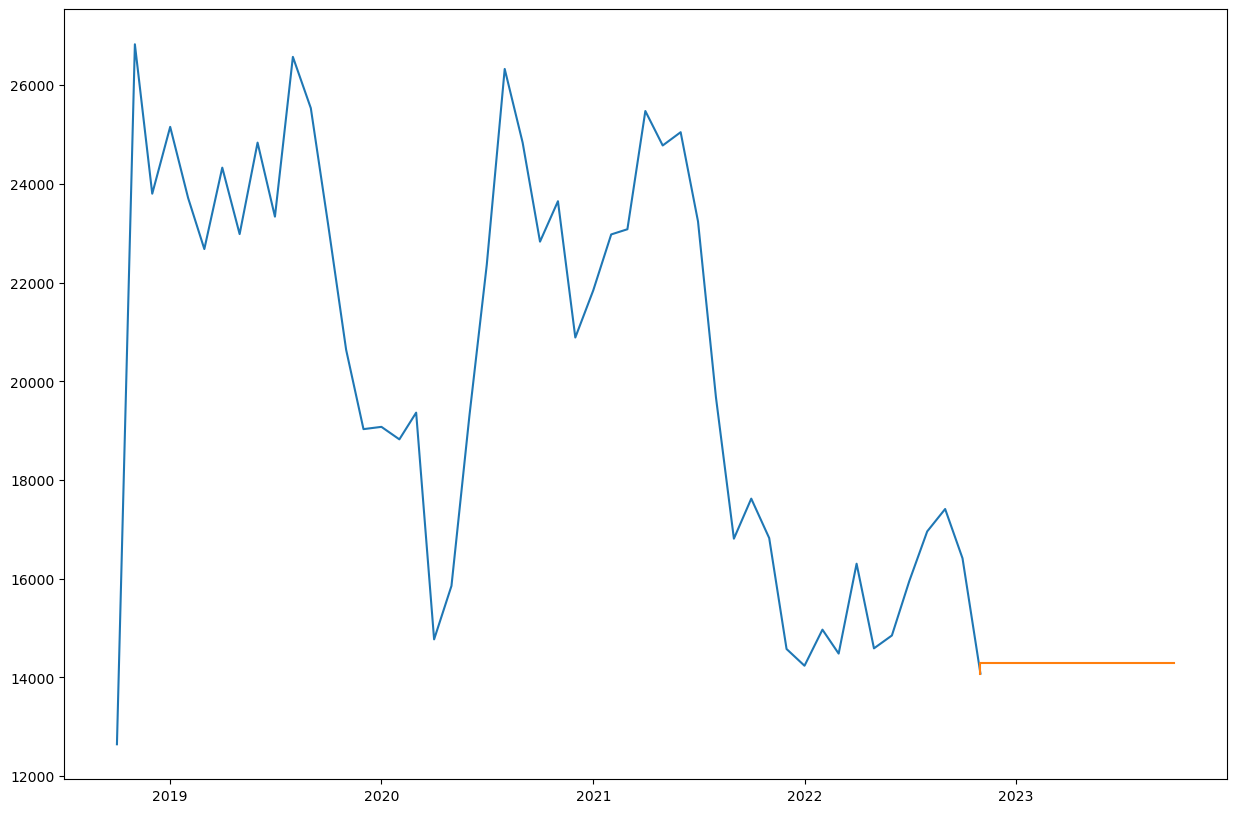

In [42]:
plt.subplots(figsize=(15,10))
plt.plot(y)
plt.plot(np.exp(y_log['Nov 2022'].append(future_months['Prediction'])))
plt.show()

### 3.2.1 Prophet Model

In [43]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_forecast_component, plot_yearly
import matplotlib.pyplot as plt

In [44]:
p3365 = df[df.store_name == '3365 - Gardens on Havana - Aurora, CO (XF)']

In [45]:
print(p3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
74554 2022-11-16  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74604 2022-11-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74654 2022-11-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74704 2022-11-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74754 2022-11-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings  
16438         1017  
16458          433  


In [46]:
p3365['fiscal_month'] = np.where(p3365.date.dt.day < 22, p3365.date, p3365.date + pd.DateOffset(months=1))
p3365.fiscal_month = p3365.fiscal_month.dt.strftime('%Y-%m')

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3336788468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3365['fiscal_month'] = np.where(p3365.date.dt.day < 22, p3365.date, p3365.date + pd.DateOffset(months=1))
/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3336788468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3365.fiscal_month = p3365.fiscal_month.dt.strftime('%Y-%m')


In [47]:
print(p3365)

            date                                  store_name    city state  \
16438 2018-10-06  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16458 2018-10-07  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16478 2018-10-08  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16498 2018-10-09  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
16518 2018-10-10  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
...          ...                                         ...     ...   ...   
74554 2022-11-16  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74604 2022-11-17  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74654 2022-11-18  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74704 2022-11-19  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   
74754 2022-11-20  3365 - Gardens on Havana - Aurora, CO (XF)  Aurora    CO   

       door_swings fiscal_month  
16438         1017      2018-

In [48]:
p3365['fiscal_month'] = pd.to_datetime(p3365['fiscal_month'])

/var/folders/4z/kf4r7q6n1q50bwwtvfh04kpc0000gp/T/ipykernel_26813/3845006873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3365['fiscal_month'] = pd.to_datetime(p3365['fiscal_month'])


In [49]:
p3365 = p3365.groupby(p3365.fiscal_month)

In [50]:
p3365 = p3365['door_swings'].sum().reset_index()

In [51]:
p3365.rename(columns={'door_swings' : 'monthly_door_swings'}, inplace=True)

In [52]:
print(p3365)

   fiscal_month  monthly_door_swings
0    2018-10-01                12647
1    2018-11-01                26827
2    2018-12-01                23800
3    2019-01-01                25154
4    2019-02-01                23713
5    2019-03-01                22679
6    2019-04-01                24328
7    2019-05-01                22982
8    2019-06-01                24835
9    2019-07-01                23335
10   2019-08-01                26572
11   2019-09-01                25533
12   2019-10-01                23168
13   2019-11-01                20639
14   2019-12-01                19031
15   2020-01-01                19077
16   2020-02-01                18824
17   2020-03-01                19365
18   2020-04-01                14772
19   2020-05-01                15855
20   2020-06-01                19299
21   2020-07-01                22360
22   2020-08-01                26327
23   2020-09-01                24834
24   2020-10-01                22829
25   2020-11-01                23648
2

In [53]:
p3365.rename(columns={'fiscal_month' : 'ds', 'monthly_door_swings' : 'y'}, inplace=True)

In [54]:
print(p3365)

           ds      y
0  2018-10-01  12647
1  2018-11-01  26827
2  2018-12-01  23800
3  2019-01-01  25154
4  2019-02-01  23713
5  2019-03-01  22679
6  2019-04-01  24328
7  2019-05-01  22982
8  2019-06-01  24835
9  2019-07-01  23335
10 2019-08-01  26572
11 2019-09-01  25533
12 2019-10-01  23168
13 2019-11-01  20639
14 2019-12-01  19031
15 2020-01-01  19077
16 2020-02-01  18824
17 2020-03-01  19365
18 2020-04-01  14772
19 2020-05-01  15855
20 2020-06-01  19299
21 2020-07-01  22360
22 2020-08-01  26327
23 2020-09-01  24834
24 2020-10-01  22829
25 2020-11-01  23648
26 2020-12-01  20887
27 2021-01-01  21842
28 2021-02-01  22975
29 2021-03-01  23080
30 2021-04-01  25475
31 2021-05-01  24777
32 2021-06-01  25046
33 2021-07-01  23238
34 2021-08-01  19674
35 2021-09-01  16812
36 2021-10-01  17623
37 2021-11-01  16824
38 2021-12-01  14577
39 2022-01-01  14238
40 2022-02-01  14969
41 2022-03-01  14484
42 2022-04-01  16305
43 2022-05-01  14590
44 2022-06-01  14851
45 2022-07-01  15951
46 2022-08-01

In [55]:
p3365.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [56]:
y_train = p3365

In [57]:
m = Prophet(interval_width = 0.95, yearly_seasonality=True)
m.fit(y_train)

14:30:15 - cmdstanpy - INFO - Chain [1] start processing
14:30:16 - cmdstanpy - INFO - Chain [1] done processing


#### 3.2.1.1 Current Forecast

In [58]:
future = list()
for i in range(1,13):
    date = '2022-%12d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [59]:
forecast = m.predict(future)

In [60]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))

           ds          yhat    yhat_lower    yhat_upper
0  2022-01-01  16891.674088  10385.004975  22853.207194
1  2022-02-01  17431.556471  11674.422473  23252.098929
2  2022-03-01  16608.167687  10553.160935  22626.226916
3  2022-04-01  17622.345587  11531.741999  23990.877173
4  2022-05-01  16473.174569  10291.976927  22458.770359
5  2022-06-01  17746.817749  12180.970428  23928.373639
6  2022-07-01  17569.888606  11425.977715  23784.620802
7  2022-08-01  19059.846927  13192.629934  25086.793672
8  2022-09-01  18313.742365  12317.961919  24233.685597
9  2022-10-01  14206.765325   8399.537366  20426.839938
10 2022-11-01  16167.294010  10482.745257  22014.863243
11 2022-12-01  14476.736945   8051.013322  20325.119425


In [61]:
print(p3365.tail(12))

           ds      y
38 2021-12-01  14577
39 2022-01-01  14238
40 2022-02-01  14969
41 2022-03-01  14484
42 2022-04-01  16305
43 2022-05-01  14590
44 2022-06-01  14851
45 2022-07-01  15951
46 2022-08-01  16959
47 2022-09-01  17413
48 2022-10-01  16415
49 2022-11-01  14078


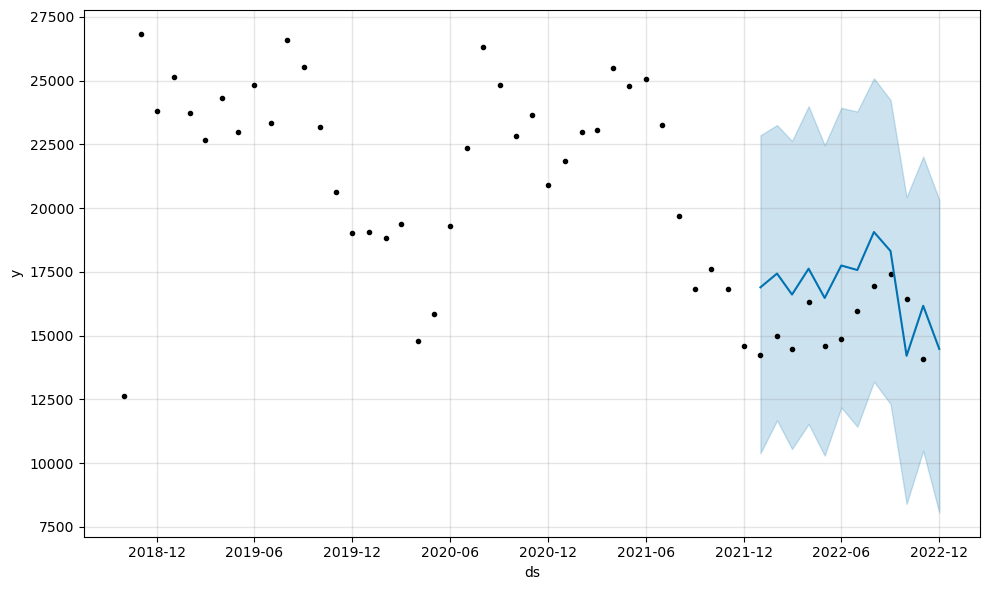

In [62]:
m.plot(forecast)
plt.show()

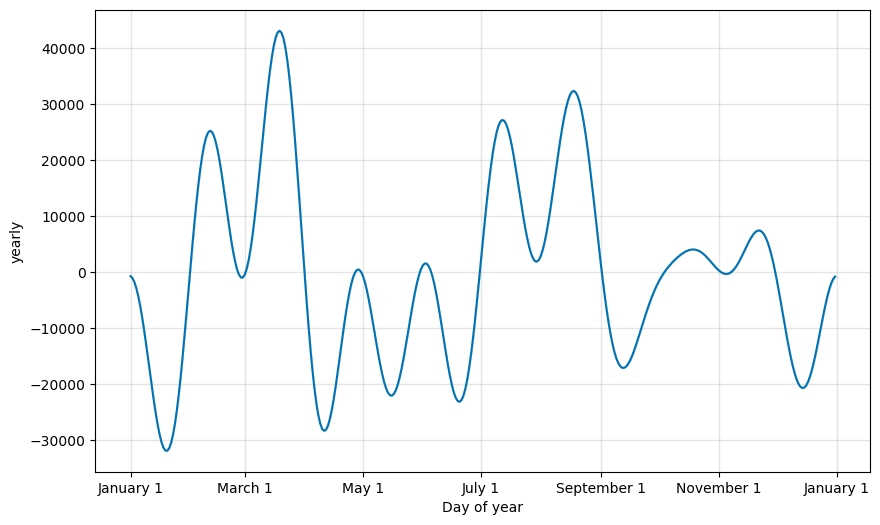

In [63]:
a = plot_yearly(m)

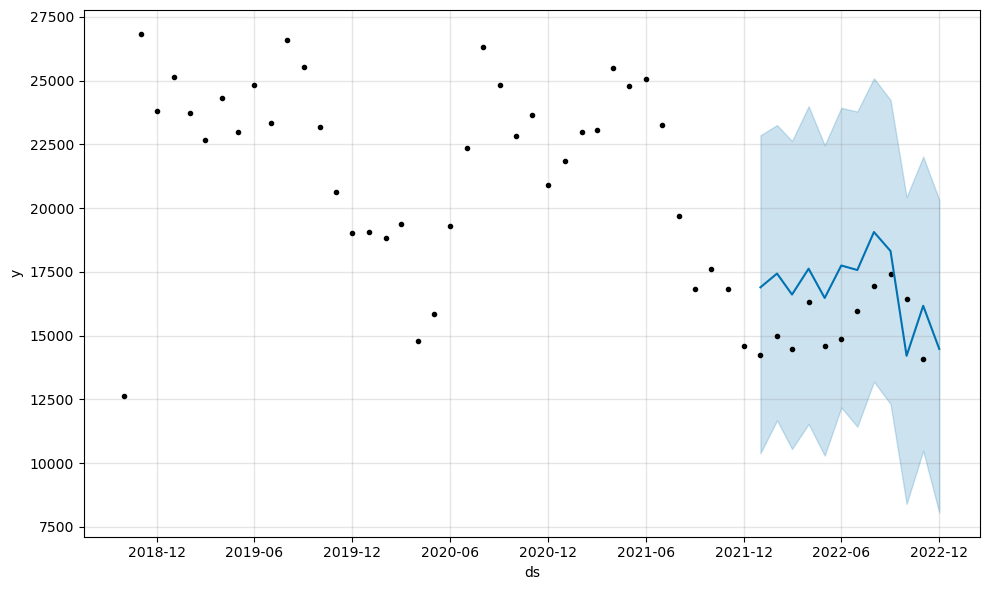

In [64]:
fig1 = m.plot(forecast)

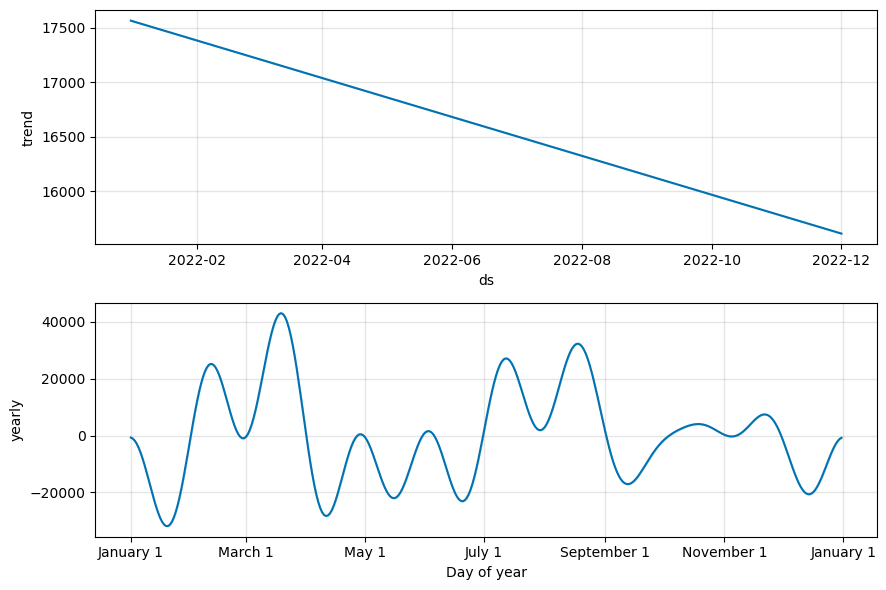

In [65]:
fig2 = m.plot_components(forecast)

In [66]:
plot_plotly(m, forecast)

14:30:17 - cmdstanpy - INFO - Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing


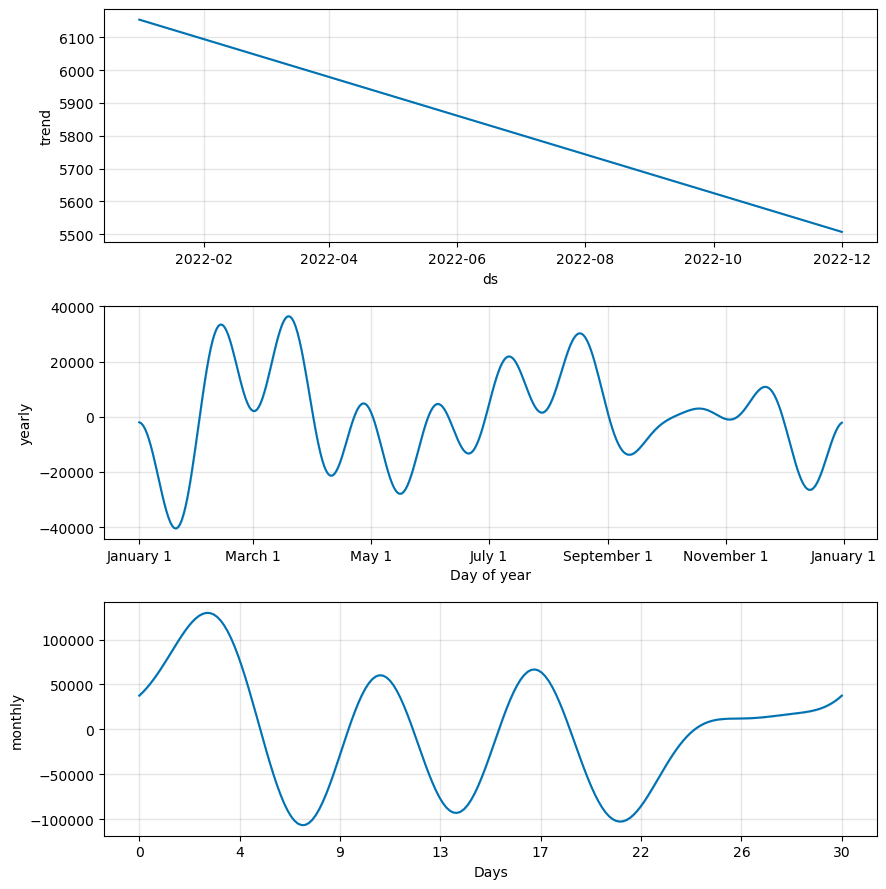

In [67]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
forecast = m.fit(p3365).predict(future)
fig3 = m.plot_components(forecast)

#### 3.2.1.2 Future Forecast

In [68]:
future = list()
for i in range(1,13):
    date = '2023-%12d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [69]:
forecast = m.predict(future)

In [70]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))

           ds          yhat    yhat_lower    yhat_upper
0  2023-01-01  15264.116486  11672.569294  18993.680168
1  2023-02-01  13497.276440  10014.395489  17004.165805
2  2023-03-01  -8494.370685 -12274.628407  -4358.709523
3  2023-04-01   5368.734696   1578.916075   8947.973840
4  2023-05-01  -8402.577166 -11911.967183  -4360.870103
5  2023-06-01   4071.803699    292.137625   7593.815797
6  2023-07-01  -8312.230329 -12504.844187  -4567.557477
7  2023-08-01   5581.882220   1834.316373   9071.571116
8  2023-09-01  13116.839246   9609.032094  17050.701489
9  2023-10-01    848.132313  -2974.345741   4414.459435
10 2023-11-01  10249.125881   6587.588988  14190.550404
11 2023-12-01   1914.653420  -1823.807733   5340.334781


In [71]:
m.plot(forecast)
plt.show()

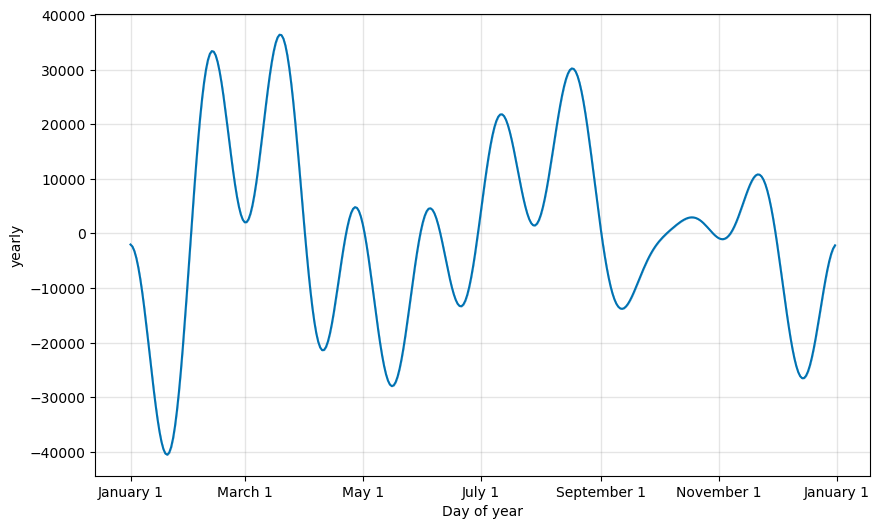

In [72]:
a = plot_yearly(m)

In [73]:
fig1 = m.plot(forecast)

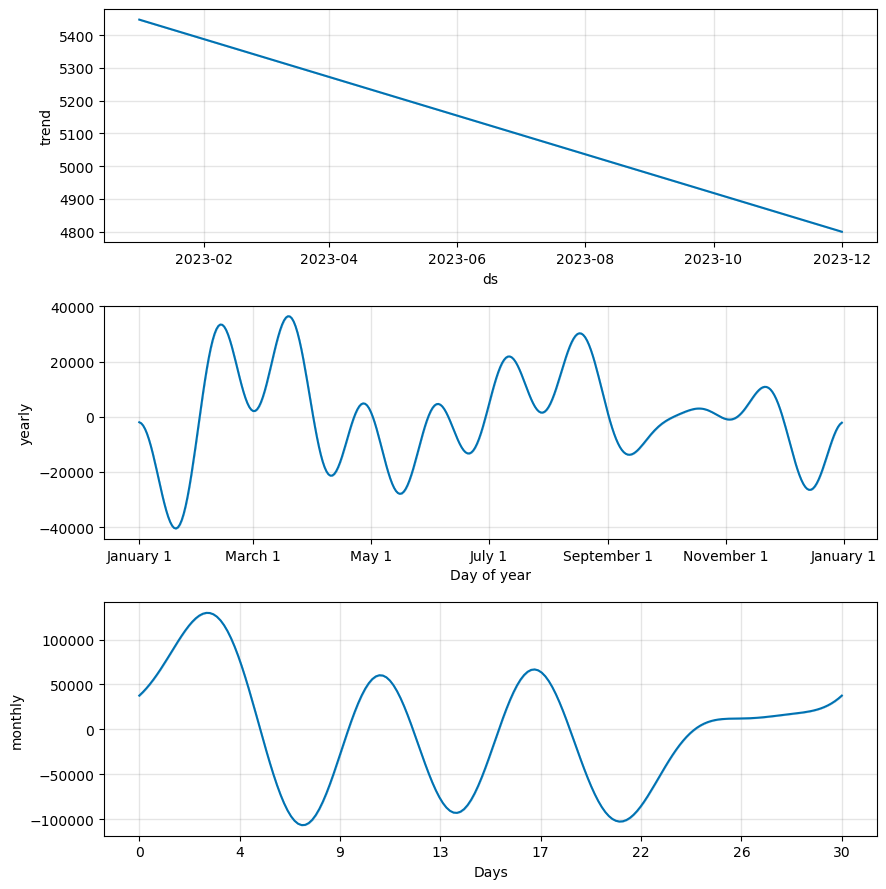

In [74]:
fig2 = m.plot_components(forecast)

In [75]:
plot_plotly(m, forecast)

In [76]:
train = p3365.drop(p3365.index[-12:])
print(train.tail())

           ds      y
33 2021-07-01  23238
34 2021-08-01  19674
35 2021-09-01  16812
36 2021-10-01  17623
37 2021-11-01  16824


In [77]:
from sklearn.metrics import mean_absolute_error
y_true = p3365['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 11791.737


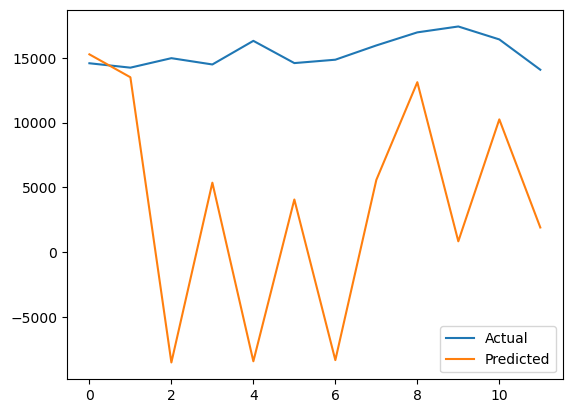

In [78]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### 3.3.1 Pyramid Model

In [84]:
import pmdarima
from pmdarima import datasets
from pmdarima import arima
from pmdarima import utils